In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install stop_words
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.tools as tls
import plotly.offline as py
import plotly.graph_objs as go
import warnings

# NLP modules
import nltk
import re 
import string
from nltk.corpus import stopwords
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob , Word
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Wordcloud Modules
from wordcloud import WordCloud , STOPWORDS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
color = sns.color_palette()
warnings.filterwarnings('ignore')
py.init_notebook_mode(connected=True)
nltk.download("stopwords")
nltk.download("all")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!

True

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/amazon_dataset/product2.csv')
df.head(5)

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427


In [ ]:
df.isnull().sum()

id                          0
brand                       0
categories                  0
dateAdded                   0
dateUpdated                 0
ean                     31979
keys                        0
manufacturer              141
manufacturerNumber        203
name                        0
reviews.date               67
reviews.dateAdded           0
reviews.dateSeen            0
reviews.didPurchase     38886
reviews.doRecommend     10615
reviews.id              38886
reviews.numHelpful      38536
reviews.rating              0
reviews.sourceURLs          0
reviews.text               36
reviews.title             476
reviews.userCity        65634
reviews.userProvince    70595
reviews.username           96
upc                         2
dtype: int64

In [ ]:
df = df.dropna(subset=['reviews.text'])

In [ ]:
df = df.dropna(subset=['reviews.rating'])

In [ ]:
df.duplicated(subset=['reviews.text', 'reviews.username', 'reviews.rating', 'reviews.date']).sum()

747

In [ ]:
df=df.drop_duplicates(subset=['reviews.text', 'reviews.username', 'reviews.rating', 'reviews.date'])

In [ ]:
df.shape

(70261, 25)

In [ ]:
df["reviews.text"] = (
    df["reviews.text"]
    .str.lower()
    .str.replace("[^\w\s]", "")
    .str.replace("\d+", "")
    .str.replace("\n", " ")
    .replace("\r", "")
    .str.replace("[^a-zA-Z0-9\s]", "")
)

In [ ]:
def word_cleaner(data):
    words = [re.sub("[^a-zA-Z]", " ", i) for i in data]
    words = [i.lower() for j in words for i in j.split()] # Split all the sentences into words
    words = [i for i in words if not i in set(stopwords.words("english"))] # Split all the sentences into words
    return words

In [ ]:
word_frequency = pd.DataFrame(
    nltk.FreqDist(word_cleaner(df["reviews.text"])).most_common(25),
    columns=["Frequent_Words", "Frequency"],
)

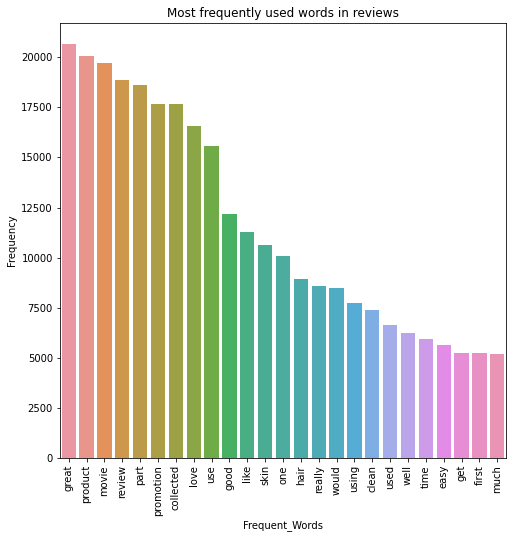

In [ ]:
plt.figure(figsize=(8, 8))
plt.xticks(rotation=90)
plt.title("Most frequently used words in reviews")
sns.barplot(x="Frequent_Words", y="Frequency", data=word_frequency)

In [ ]:
df['reviews_length']=df['reviews.text'].apply(len)

In [ ]:
lemmatizer_output = WordNetLemmatizer()

df["reviews.text"] = df["reviews.text"].apply(
    lambda x: word_tokenize(x.lower())
)
df["reviews.text"] = df["reviews.text"].apply(
    lambda x: [word for word in x if word not in STOPWORDS]
)
df["reviews.text"] = df["reviews.text"].apply(
    lambda x: [lemmatizer_output.lemmatize(word) for word in x]
)
df["reviews.text"] = df["reviews.text"].apply(lambda x: " ".join(x))

In [ ]:
df['reviews.text'].head(10)

0    love album good hip hop side current pop sound...
1          good flavor review collected part promotion
2                                          good flavor
3    read review looking buying one couple lubrican...
4    husband bought gel u gel caused irritation fel...
5    boyfriend bought spice thing bedroom highly di...
6    bought earlier today excited check based produ...
7    bought product husband try impressed tingling ...
8    husband bought extra fun werevboth extremely d...
9    got surprise husband nothing special lube save...
Name: reviews.text, dtype: object

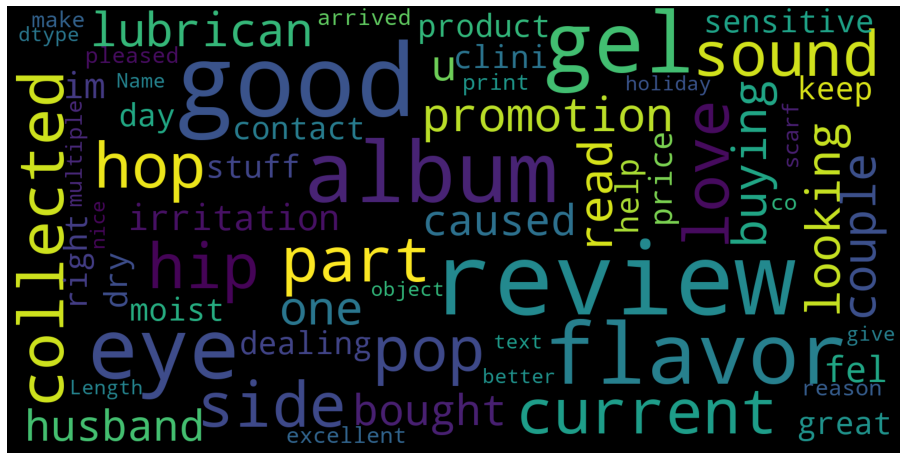

In [ ]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)


def show_wordcloud(data, title=None):
    wordcloud = WordCloud(
        background_color="black",
        stopwords=stopwords,
        max_words=250,
        max_font_size=45,
        scale=4,
        random_state=1,
    ).generate(str(data))

    fig = plt.figure(1, figsize=(16, 16))
    plt.axis("off")
    if title:
        fig.suptitle(title, fontsize=21)
        fig.subplots_adjust(top=2.1)

    plt.imshow(wordcloud)
    plt.show()


show_wordcloud(df["reviews.text"])


[Text(0.5, 1.0, 'Frequency of each rating')]

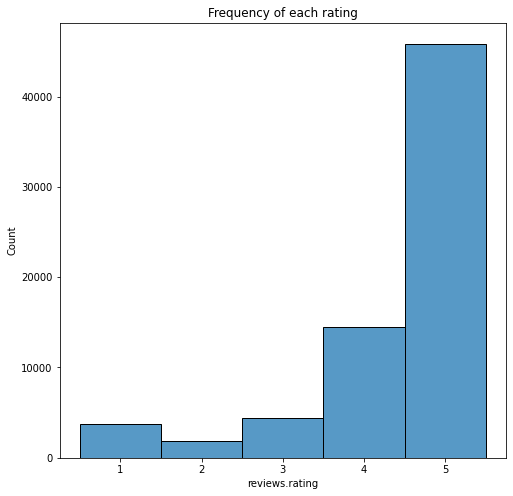

In [ ]:
plt.figure(figsize=(8,8))
sns.histplot(data=df, x=df['reviews.rating'], discrete="True").set(title = "Frequency of each rating")

In [ ]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

In [ ]:
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer

all_text=df['reviews.text']
train_text=df['reviews.text']
y=df['reviews.rating']

In [ ]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000)
word_vectorizer.fit(all_text)
train_word_features = word_vectorizer.transform(train_text)

In [ ]:
train_word_features

<70261x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 1037725 stored elements in Compressed Sparse Row format>

In [ ]:
# train_text_tf = train_word_features.toarray()

In [ ]:
ros = NearMiss()

In [ ]:
X_resample, y_resample = ros.fit_resample(train_word_features, y)

In [ ]:
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({5: 45864, 4: 14508, 3: 4361, 1: 3697, 2: 1831})


In [ ]:
smote = SMOTE(random_state=42)
X_smote, y_smote= smote.fit_resample(train_word_features, y)

In [ ]:
print('Resampled dataset shape %s' % Counter(y_resample))

Resampled dataset shape Counter({1: 1831, 2: 1831, 3: 1831, 4: 1831, 5: 1831})


In [ ]:
print('Resampled dataset shape %s' % Counter(y_smote))

Resampled dataset shape Counter({5: 45864, 1: 45864, 3: 45864, 4: 45864, 2: 45864})


In [ ]:
# char_vectorizer = TfidfVectorizer(
#     sublinear_tf=True,
#     strip_accents='unicode',
#     analyzer='char',
#     stop_words='english',
#     ngram_range=(2, 6),
#     max_features=50000)
# char_vectorizer.fit(all_text)
# train_char_features = char_vectorizer.transform(train_text)

# train_features = hstack([train_char_features, X_resample])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote,test_size=0.3,random_state=101)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [ ]:
classifier.score(X_train, y_train)

0.9988412947596621

In [ ]:
y_pred

array([3, 4, 2, ..., 5, 4, 3])

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
f1_score(y_test, y_pred, average='micro')

0.9217541717541717

In [ ]:
accuracy_score(y_test, y_pred)

0.9217541717541717

In [ ]:
from sklearn.model_selection import train_test_split
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(train_word_features, y,test_size=0.3,random_state=101)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifiern = RandomForestClassifier()
classifiern.fit(X_train_n,y_train_n)
y_pred_n=classifiern.predict(X_test_n)

In [ ]:
classifiern.score(X_train_n, y_train_n)

0.997539750315156

In [ ]:
f1_score(y_test_n, y_pred_n, average='micro')

0.7218084349352436

In [ ]:
from sklearn.model_selection import train_test_split
X_trainm, X_testm, y_trainm, y_testm = train_test_split(X_resample, y_resample,test_size=0.3,random_state=101)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifiernm = RandomForestClassifier()
classifiernm.fit(X_trainm,y_trainm)
y_predm=classifiernm.predict(X_testm)

In [ ]:
classifiern.score(X_trainm, y_trainm)

0.8250624219725343

In [ ]:
f1_score(y_testm, y_predm, average='micro')

0.5769930833636695

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
k_pred1=neigh.predict(X_test)

In [ ]:
neigh.fit(X_train_n, y_train_n)
k_pred2=neigh.predict(X_test_n)

In [ ]:
neigh.fit(X_trainm, y_trainm)
k_pred3=neigh.predict(X_testm)

In [ ]:
neigh.score(X_train, y_train)

0.4819403952057013

In [ ]:
neigh.score(X_train_n, y_train_n)

0.648143629783254

In [ ]:
neigh.score(X_trainm, y_trainm)

0.8486267166042447

In [ ]:
f1_score(y_test, k_pred1, average='micro')

0.7615995115995117

In [ ]:
f1_score(y_test_n, k_pred2, average='micro')

0.6692917121305565

In [ ]:
f1_score(y_testm, k_pred3, average='micro')

0.36184929013469236

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

In [ ]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

In [ ]:
X_train_tf = np.array(X_train, dtype=float)
y_train_tf = np.array(y_train, dtype=float)
X_test_tf = np.array(X_test, dtype=float)

ValueError: ignored

In [ ]:
X_train

<160524x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 3396409 stored elements in Compressed Sparse Row format>

In [ ]:
clf.fit(list(X_train_tf), y_train_tf)
s_pred3=clf.predict(X_test_tf)

TypeError: ignored

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
x_pred1 = clf.predict(X_test)

In [ ]:
clf.fit(X_train_n, y_train_n)
x_pred2 = clf.predict(X_test_n)

In [ ]:
clf.fit(X_trainm, y_trainm)
x_pred3 = clf.predict(X_testm)

In [ ]:
clf.score(X_train, y_train)

0.5275472826493235

In [ ]:
clf.score(X_train_n, y_train_n)

0.43849375787889877

In [ ]:
clf.score(X_trainm, y_trainm)

0.9897003745318352

In [ ]:
f1_score(y_test, x_pred1, average='micro')

0.9305337519623234

In [ ]:
f1_score(y_test_n, x_pred2, average='micro')

0.7219507566772617

In [ ]:
f1_score(y_testm, x_pred3, average='micro')

0.5646159446669093

In [ ]:
import xgboost as xgb

In [ ]:
xgb=xgb.XGBClassifier()

In [ ]:
xgb.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
xgb.fit(X_train_n,y_train_n)

XGBClassifier(objective='multi:softprob')

In [ ]:
xgb.fit(X_trainm,y_trainm)

XGBClassifier(objective='multi:softprob')

In [ ]:
xgb.score(X_trainm, y_trainm)

0.6058052434456929

In [ ]:
xg_pred1 = xgb.predict(X_test)

In [ ]:
xg_pred2 = xgb.predict(X_test_n)

In [ ]:
xg_pred3 = xgb.predict(X_testm)

In [ ]:
xgb.score(X_train, y_train)

0.5476128180209813

In [ ]:
xgb.score(X_train_n, y_train_n)

0.5647797974868854

In [ ]:
xgb.score(X_trainm, y_trainm)

0.4747191011235955

In [ ]:
f1_score(y_test, xg_pred1, average='micro')

0.5396098610384324

In [ ]:
f1_score(y_test_n, xg_pred2, average='micro')

0.5664405332321267

In [ ]:
f1_score(y_testm, xg_pred3, average='micro')

0.4710593374590462

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.7248445168662022

In [ ]:
reg1 = reg.predict(X_test)
reg1

array([2.6678957 , 3.50599172, 2.70591627, ..., 5.28994666, 3.5457573 ,
       3.12708933])

In [ ]:
f1_score(y_test, reg1, average='micro')

ValueError: ignored

In [ ]:
y_test_vals = y_test.values
y_test_vals

In [ ]:
y_pred

In [ ]:
pred

In [ ]:
reg_pred

In [ ]:
c = 0
for i in pred:
  if i==1:
    c=c+1
c

633

In [ ]:
#LINEAR REGRESSiON

In [ ]:
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df.loc[df['reviews.rating'] < 4, 'sentiment'] = 0
df.loc[df['reviews.rating'] >= 4, 'sentiment'] = 1

In [ ]:
df['sentiment']

0        1.0
1        1.0
2        1.0
3        0.0
4        0.0
        ... 
71039    1.0
71040    1.0
71041    1.0
71042    1.0
71043    1.0
Name: sentiment, Length: 70261, dtype: float64

In [ ]:
all_text=df['reviews.text']
train_text=df['reviews.text']
y=df['sentiment']

In [ ]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000)
word_vectorizer.fit(all_text)
train_word_features = word_vectorizer.transform(train_text)

In [ ]:
train_word_features

<70261x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 1037725 stored elements in Compressed Sparse Row format>

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

In [ ]:
ros = NearMiss()

In [ ]:
X_resample, y_resample = ros.fit_resample(train_word_features, y)

In [ ]:
smote = SMOTE(random_state=42)
X_smote, y_smote= smote.fit_resample(train_word_features, y)

In [ ]:
print('Original dataset shape %s' % Counter(y))
print('Resampled dataset shape %s' % Counter(y_resample))
print('Resampled dataset shape %s' % Counter(y_smote))

Original dataset shape Counter({1.0: 60372, 0.0: 9889})
Resampled dataset shape Counter({0.0: 9889, 1.0: 9889})
Resampled dataset shape Counter({1.0: 60372, 0.0: 60372})


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,test_size=0.3,random_state=101)

In [ ]:
from sklearn.model_selection import train_test_split
X_traino, X_testo, y_traino, y_testo = train_test_split(X_smote, y_smote,test_size=0.3,random_state=101)

In [ ]:
from sklearn.model_selection import train_test_split
X_trainu, X_testu, y_trainu, y_testu = train_test_split(X_resample, y_resample,test_size=0.3,random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
reg = LogisticRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.9378290614458211

In [ ]:
rego = LogisticRegression().fit(X_traino, y_traino)
rego.score(X_traino, y_traino)

0.9067203028868907

In [ ]:
regu = LogisticRegression().fit(X_trainu, y_trainu)
regu.score(X_trainu, y_trainu)

0.9092747760762785

In [ ]:
ylm = reg.predict(X_test)

In [ ]:
ylmo = rego.predict(X_testo)

In [ ]:
ylmu = regu.predict(X_testu)

In [ ]:
ylm, ylmo, ylmu

(array([1., 0., 1., ..., 1., 0., 0.]),
 array([0., 0., 0., ..., 0., 1., 0.]),
 array([1., 1., 0., ..., 1., 1., 0.]))

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
f1_score(y_test, ylm, average='micro')

0.9259967632779167

In [ ]:
f1_score(y_testo, ylmo, average='micro')

0.8904317579505301

In [ ]:
f1_score(y_testu, ylmu, average='micro')

0.884732052578362

In [ ]:
test_ft = word_vectorizer.transform(["so satisfied with the purchase good product works well"])

In [ ]:
rego.predict(test_ft)

array([1.])

In [ ]:
test_ft = word_vectorizer.transform(["very disappointed with the purchase defective product"])

In [ ]:
rego.predict(test_ft)

array([0.])

In [ ]:
test_ft = word_vectorizer.transform(["used to be good but since the change the worst product ever"])

In [ ]:
rego.predict(test_ft)

array([0.])

In [ ]:
test_ft = word_vectorizer.transform(["used to be bad but from when it was updated it is the best product ever"])

In [ ]:
rego.predict(test_ft)

array([1.])